In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [42]:
from sklearn.datasets import load_boston

In [66]:
boston_dataset = load_boston()

In [67]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [68]:
#將資料輸成dataframe格式
boston = pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)

In [69]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [70]:
boston["MEDV"] = boston_dataset.target

In [71]:
#取CRIM到LSTAT的所有資料
X = boston.loc[:,'CRIM':'LSTAT'].values
Y = boston.MEDV

In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [73]:
1.
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [74]:
2.
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [75]:
3.
y_predict_1 = model.predict(x_test)

In [76]:
y_predict_1

array([24.88963777, 23.72141085, 29.36499868, 12.12238621, 21.44382254,
       19.2834443 , 20.49647539, 21.36099298, 18.8967118 , 19.9280658 ,
        5.12703513, 16.3867396 , 17.07776485,  5.59375659, 39.99636726,
       32.49654668, 22.45798809, 36.85192327, 30.86401089, 23.15140009,
       24.77495789, 24.67187756, 20.59543752, 30.35369168, 22.41940736,
       10.23266565, 17.64816865, 18.27419652, 35.53362541, 20.96084724,
       18.30413012, 17.79262072, 19.96561663, 24.06127231, 29.10204874,
       19.27774123, 11.15536648, 24.57560579, 17.5862644 , 15.49454112,
       26.20577527, 20.86304693, 22.31460516, 15.60710156, 23.00363104,
       25.17247952, 20.11459464, 22.90256276, 10.0380507 , 24.28515123,
       20.94127711, 17.35258791, 24.52235405, 29.95143046, 13.42695877,
       21.72673066, 20.7897053 , 15.49668805, 13.98982601, 22.18377874,
       17.73047814, 21.58869165, 32.90522136, 31.11235671, 17.73252635,
       32.76358681, 18.7124637 , 19.78693475, 19.02958927, 22.89

In [77]:
#畫圖
import seaborn as sns
sns.set()

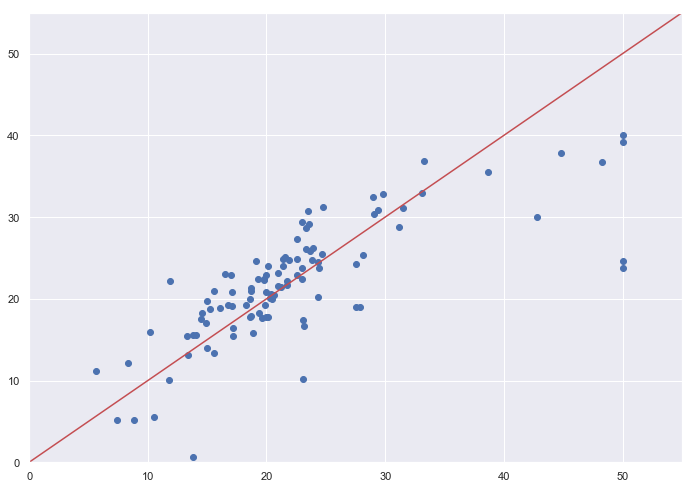

In [78]:
#畫出原本預測圖
plt.scatter(y_test,y_predict)
plt.xlim(0,55)
plt.ylim(0,55)
plt.plot([0,55],[0,55],'r')

In [79]:
#取相關係數
correlation_matrix = boston.corr().round(2)

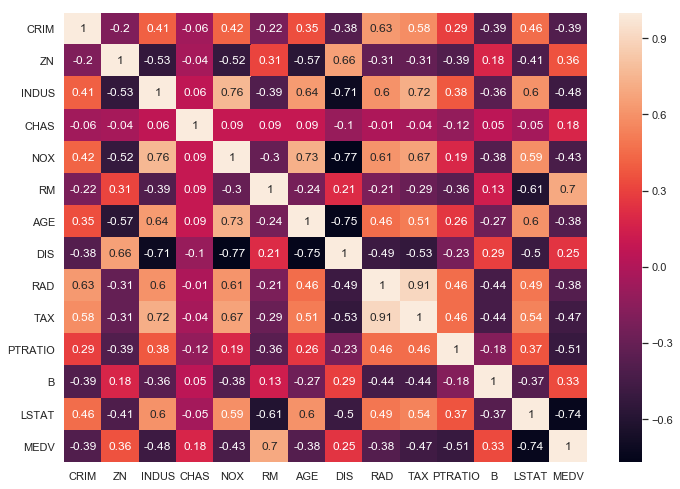

In [80]:
#將相關係數畫出來
sns.set(rc={"figure.figsize":(11.7, 8.27)})
sns.heatmap(correlation_matrix, annot = True)

In [81]:
#兩變量相關係數越接近0，代表他們的線性關係不大，因此刪掉MEDV相關係數前四個最接近0的特徵
boston.drop(["CHAS", "DIS", "B","ZN"], axis=1, inplace=True)

In [82]:
X = boston.drop("MEDV", axis=1)
Y = boston.MEDV

In [83]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size =0.2,random_state =0)

In [84]:
1.
model = LinearRegression()

In [85]:
2.
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [86]:
3.
y_predict_2 = model.predict(x_test)

In [87]:
y_predict_2

array([24.94535717, 22.38981323, 28.36140951, 11.02871663, 22.53448602,
       19.58986558, 19.68374905, 21.91941309, 16.32765273, 21.2988884 ,
        8.53999768, 17.81044862, 17.580582  ,  3.64787054, 39.45272062,
       33.17883193, 22.19339698, 37.38960746, 29.12170315, 22.01579707,
       25.17380036, 25.97209688, 18.29139849, 27.77211316, 22.56767528,
       10.15496289, 18.14043845, 20.64341948, 35.62539715, 20.05846277,
       17.67824202, 18.04531247, 24.51270251, 25.42865297, 28.00033278,
       16.73691757, 10.00800062, 20.76111808, 18.74160079, 15.02194056,
       27.54451832, 20.86941716, 23.63869006, 14.94886319, 26.16052385,
       27.06169025, 23.339178  , 22.75061466,  9.96882149, 23.14119713,
       22.31948536, 14.59444092, 24.19650135, 34.52602397, 14.42768378,
       22.73380681, 21.23713337, 19.97307574, 16.37691327, 20.38969675,
       21.75441078, 21.8084162 , 32.40213379, 29.51881525, 16.4237641 ,
       30.58371233, 19.31921683, 23.73481348, 19.35492189, 21.60

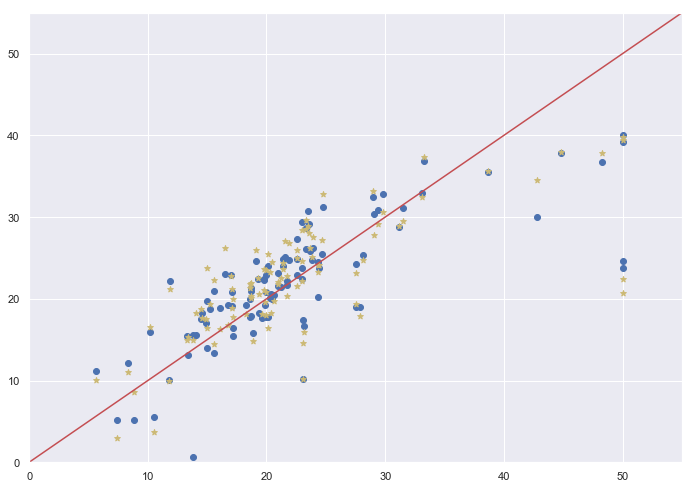

In [88]:
#相較於使用所有變數去預測，刪掉相關係數較接近0的特徵會使分佈結果變得更好
plt.scatter(y_test, y_predict_1)
plt.scatter(y_test, y_predict_2, marker = "*", c="y")
plt.xlim(0,55)
plt.ylim(0,55)
plt.plot([0,55], [0,55], "r")